In [102]:
import numpy as np
import matplotlib.pyplot as plt

## Numerical differentiation

https://en.wikipedia.org/wiki/Numerical_differentiation

La definición de derivada es la siguiente:

$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$ 

La forma más simple de aproximar esto es simplemente elegir un valor de $h$ pequeño:

$f'(x) \approx \frac{f(x+h) - f(x)}{h}$ 

Otra forma, es coger un intervalo a ambos lados:

$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$ 

![secant derivate](https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Derivative.svg/345px-Derivative.svg.png)


-0.2151199877292731


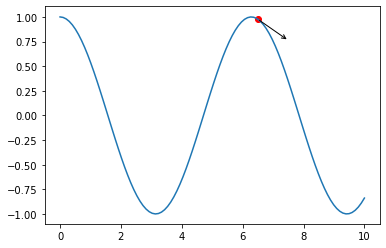

In [120]:
def secant_derivate(f, x, h=0.001):
    return (f(x+h)-f(x-h))/(2*h)

f = lambda x: np.cos(x)

x0 = 6.5
slope = secant_derivate(f, x=x0, h=0.0001)
print(slope)

def plot_derivate(f, x0, slope):
    xs = np.linspace(0,10,100)
    ys = [f(x) for x in xs]
    plt.plot(xs, ys)
    plt.scatter(x0, f(x0), c='red')
    plt.annotate(s='', xy=(x0,f(x0)), xytext=(x0+1,f(x0)+slope), arrowprops=dict(arrowstyle='<-'))
    
plot_derivate(f, x0, slope)

## Roundoff vs Truncation errors:

Por lo general elegir un valor de h pequeño aumenta la **precisión** de la derivada, pero cuidado con pasarse, la precisión de los números de coma flotante es limitada y se producen **errores de redondeo**.

https://en.wikipedia.org/wiki/Round-off_error

https://math.stackexchange.com/questions/728666/calculate-jacobian-matrix-without-closed-form-or-analytical-form

0.0


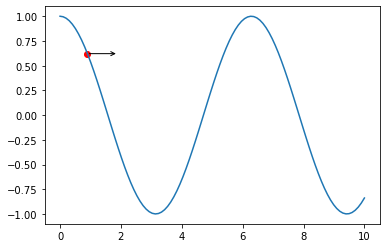

In [118]:
x0 = 0.9
slope = secant_derivate(f, x=x0, h=0.000000000000000001)  # h too small leads to roundoff errors
print(slope)

plot_derivate(f, x0, slope)

## Gradiente

El **gradiente** es la extensión de la derivada cuando la función es de **varias variables**: simplemente poner **derivadas parciales** en un vector: 

$\nabla f(x,y) = 
    \begin{bmatrix}
        \frac{\partial f(x,y)}{\partial x} \\
        \frac{\partial f(x,y)}{\partial y}
    \end{bmatrix}
$

Numéricamente, cada una de esas derivadas las podemos aproximar por separado:

$
\nabla f(x,y) \approx 
    \begin{bmatrix} 
        \frac{f(x+h, y) - f(x-h,y)}{2h} \\ 
        \frac{f(x, y+h) - f(x,y-h)}{2h}
    \end{bmatrix}
$

In [100]:
def partial_derivate(f, x, i, h):
    x_plus_h = x.copy()
    x_minus_h = x.copy()
    x_plus_h[i] += h
    x_minus_h[i] -= h
    return (f(x_plus_h)-f(x_minus_h))/(2*h)

def gradient(f, x, h=0.001):
    return [partial_derivate(f, x, i, h)
            for i in range(len(x))]

f = lambda x: 2*x[0]**2 + 3*x[1]  # f(x,y) = 2x^2 + 3y

gradient(f, x=[1,1])

[4.0000000000000036, 3.0000000000001137]

## Jacobian

Cuando la función no es solo de varias variables sino que tiene varias componentes $f(x, y) = [f_1(x,y), f_2(x,y),  ..$], el Gradiente se convierte en el Jacobiano. Es decir, si el Gradiente era un vector columna de derivadas parciales, el Jacobiano es una matriz con varios vectores columna, uno para cada componente de $f$: 

$
\textbf{J}(f(x,y)) =
\begin{bmatrix}
    \nabla f_1, \nabla f_2, \nabla f_3 ...
\end{bmatrix} = 
\left[\begin{array}{c|c|c}
    \frac{\partial f_1(x,y)}{\partial x} & \frac{\partial f_2(x,y)}{\partial x} & \frac{\partial f_3(x,y)}{\partial x} & \cdots \\
    \frac{\partial f_1(x,y)}{\partial y} & \frac{\partial f_2(x,y)}{\partial y} & \frac{\partial f_3(x,y)}{\partial y} & \cdots
\end{array}\right]
$

Numéricamente, de nuevo cada una de esas derivadas las podemos aproximar por separado:

$
\textbf{J}(f(x,y)) \approx
\left[\begin{array}{c|c|c}
    \frac{f_1(x+h, y) - f(x,y)}{h} & \frac{f_2(x+h, y) - f(x,y)}{h} & \frac{f_3(x+h, y) - f(x,y)}{h} & \cdots \\
    \frac{f_1(x, y+h) - f(x,y)}{h} & \frac{f_2(x, y+h) - f(x,y)}{h} & \frac{f_3(x, y+h) - f(x,y)}{h} & \cdots
\end{array}\right]
$


In [109]:
# https://math.stackexchange.com/a/2869151

def component(f, i):
    return lambda *args: f(*args)[i]

def jacobian(f, x, h=0.001):
    n_components = len(f(x))
    return [gradient(component(f, j), x, h=h)
            for j in range(n_components)]


my_f = lambda x: [2*x[0]**2 + 3*x[1], 2*x[0]]

jacobian(my_f, x=[1,2])

[[4.0000000000000036, 3.0000000000001137], [1.9999999999998908, 0.0]]

## Hessian

Volviendo a funciones con una sola componente, y varias variables $f(x,y)$. Si queremos calcular la segunda derivada de la funcion o lo que es lo mismo, derivar el gradiente, nos queda la Hessiana:

$
\nabla^2 f = 
\begin{bmatrix}
    \frac{\partial^2 f}{\partial x^2} \frac{\partial^2 f}{\partial x \partial y} \\
    \frac{\partial^2 f}{\partial y \partial x} \frac{\partial^2 f}{\partial y^2}  
\end{bmatrix}
$

Esta matriz es simétrica siempre que las segundas derivadas sean continuas
